# Contenidos

1. [Introducción](#data1)

2. [Integrantes del grupo y roles](#data2)

3. [Metodología CRISP-DM](#data3)
    
    3.1. [Comprensión del negocio](#data31)
     
     3.1.1. [Objetivos del proyecto](#data311)

     3.1.2. [Objetivos de Data Science](#data312)
    
     3.2. [Comprensión de los datos](#data32)

     3.2.1.[Recolectar los datos iniciales](#data321)

     3.2.2.[Descripción de los datos](#data322)

     3.2.3.[Exploración de los datos](#data323)

     3.2.4.[Verificar la calidad de los datos](#data324)

    3.3. [Preparacion de los datos](#data33)

     3.3.1. [Exploración de los datos](#data331)

     3.3.2.[Construir los datos](#data332)

     3.3.3.[Requerimientos](#data333)

    3.3. [Modelado](#data34)
    
4. [Conclusiones](#data4)

   


## 1. Introducción <a name="data1"></a>

Para este trabajo final de fundamentos de Data Science estaremos llevando a cabo un proyecto de analítica de datos a petición de una firma consultora con sede en Lima. El objetivo es comprender las características de los clientes que adquieren bicicletas, centrándonos principalmente en sus ingresos, edad y los vehículos adicionales que utilizan. Esto se hace con la finalidad de implementar un scoring de venta, identificando con ello los clientes más propensos a comprar una bicicleta.

## 2. Integrantes del grupo y roles <a name="data2"></a>


| Integrante           | Rol                      | Responsabilidades                                                                                                                                                              |
|---------------------|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Esteban Cabrera   | Business Project Sponsor | - Liderar y supervisar el progreso del proyecto. <br> - Promover y respaldar el proyecto en la organización.                                                                   |
| Abigail Gonzales  | Data Science             | - Analizar los datos y encontrar patrones significativos. <br> - Aplicar técnicas de modelado y estadísticas para desarrollar el scoring. <br> - Utilizar gráficos para visualizar los resultados y comunicar hallazgos importantes. |
| Marco Fuentes     | Data Engineer            | - Limpiar los datos, identificar y manejar los valores nulos y outliers. <br> - Realizar transformaciones y preparación de datos para su posterior análisis.                  |


## 3. Metodología CRISP-DM <a name="data3"></a>

### 3.1 Comprensión del negocio <a name="data31"></a>

#### 3.1.1. Objetivos del proyecto: <a name="data311"></a>
Nuestro objetivo principal es analizar con detenimiento los datos acerca de los clientes interesados en comprar una bicicleta. Esto con la finalidad de hacer un scoring de venta que identifique los clientes más propensos a comprar una bicicleta.<br>

Con ello, nos importa que estos datos sean de calidad y confiables, por ello, tenemos que: Pre-procesar y procesar los datos para así tenerlos con buena calidad. Con ello estaremos lidiando con valores nulos, repetido y atípicos (outliers).
Y para hacer el scoring necesitamos:

*	El promedio de ingresos de los clientes
*	La distribución de: las regiones donde se encuentran los clientes, su distancia de viaje por su ocupación, su ocupación, estado civil, nivel educativo, género, edad, hijos y casa propia.
*	Encontrar las relaciones vistas de acuerdo con las distribuciones antes mencionadas
* Ver la cantidad de clientes que tiene comprada una bicicleta.

#### 3.1.2. Objetivos de Data Science : <a name="data312"></a>

Nuestro objetivo en términos de Data Science predecir que tan propensos están los clientes de querer comprar una bicicleta por medio de su scoring.

### 3.2 Comprensión de los datos <a name="data32"></a>

#### 3.2.1 Recolección de los datos iniciales

La data llamado bike_buyers fue proporcianado por la empresa Peru_bike que dedicada a la venta de bicicletas esta data esta compuesta por un conjunto de datos que tiene detalles de 1000 usuarios de diferentes orígenes y si compran o no una bicicleta. Esta data contiene 13 campos como lo son:
1. ID: Numeric
2. Marital Status: Binary
3. Gender:Binary
4. Income: Numeric
5. Children: Numeric
6. Education:Sequential
7. Occupation: Sequential
8. Home Owner:Binary
9. Cars: Numeric
10. Commute Distance: Numeric
11. Region:Nominal
12. Age:Numeric
13. Purchased Bike:Binary


#### 3.2.2 Descripción de los datos

| Variable            | Descripción                                                                                                          |
|---------------------|----------------------------------------------------------------------------------------------------------------------|
| ID                  | Identificación del comprador                                                                                        |
| Marital Status      | Estado civil del comprador (casado o soltero)                                                                        |
| Gender              | Género del comprador (hombre o mujer)                                                                                |
| Income              | Ingresos del comprador en un determinado período de tiempo                                                           |
| Children            | Número de hijos que tiene el comprador                                                                               |
| Education           | Antecedentes educativos del comprador (licenciatura, posgrado, escuela secundaria, universidad parcial, etc.)        |
| Occupation          | Trabajo u ocupación del comprador (oficinista, administrativo, manual, profesional, etc.)                            |
| Home Owner          | Estado del comprador si posee o no una casa propia                                                                   |
| Cars                | Número de coches que posee el comprador                                                                              |
| Commute Distance    | Distancia entre la casa del comprador y la empresa en la que trabaja (0-1 millas, 1-2 millas, 10+ millas, etc.)       |
| Region              | Región donde vive el comprador (Europa, América del Norte, el Pacífico, etc.)                                        |
| Age                 | Edad del comprador                                                                                                   |
| Purchased Bike      | Estado del comprador si ha comprado la bicicleta o no                                                                 |

#### 3.2.3 Exploración de los datos <a name="data323"></a>

Importamos las libreraias a usar

In [ ]:
import pandas as pd
from tabulate import tabulate
import plotly.graph_objects as ply
import plotly.express as px
import missingno as msno #visualizar los datos faltantes
from plotly.subplots import make_subplots
import numpy as np


#####Cargar los datos

cargamos la dataset de un csv llamado **bike_buyes**

In [ ]:
datos = pd.read_csv('/content/bike_buyers.csv')
data_bike = pd.DataFrame(datos)
data_bike.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


#####Inspeccionar los datos


Para esta inspeccion de datos tendremos en cuenta ciertos puntos

* [Saber cuantas filas y columnas tiene nuestra data](#criterio1)
* [Nombre de cada columna](#criterio2)
* [El tipo de dato que tiene cada columna](#criterio3)
* [Tablas de frecuencia](#criterio4)

1.Saber cuantas filas y columnas tiene nuestra data  <a name="criterio1"></a>






In [ ]:
print("Estamos evaluando", data_bike.shape[0] ,"filas con ",data_bike.shape[1] , "columnas")

Estamos evaluando 1000 filas con  13 columnas


2.Nombre de cada columna <a name="criterio2"></a>

In [ ]:
print("Nombres de columnas")
tabla = []
for columna in data_bike.columns:
    tabla.append(columna)
pd.DataFrame(tabla, columns='Columna'.split())

Nombres de columnas


,Columna
0,ID
1,Marital Status
2,Gender
3,Income
4,Children
5,Education
6,Occupation
7,Home Owner
8,Cars
9,Commute Distance


3.El tipo de dato que tiene cada columna <a name="criterio3"></a>

In [ ]:
print("Tipos de datos")
tabla = []
for columna in data_bike.columns:
    tabla.append([columna, data_bike[columna].dtype])
pd.DataFrame(tabla, columns='Columna Tipo_de_dato'.split())


Tipos de datos


,Columna,Tipo_de_dato
0,ID,int64
1,Marital Status,object
2,Gender,object
3,Income,float64
4,Children,float64
5,Education,object
6,Occupation,object
7,Home Owner,object
8,Cars,float64
9,Commute Distance,object


4. Contenido de la data  <a name="criterio4"></a>

In [ ]:
data_bike.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


5. Tablas de frecuencia <a name="criterio5"></a>


Enesta tabla de frecuencia puedo acceder a un resumen de cinco números para valores int.Donde puedo observar y saber los cuartiles medios y medianos y puedo con solo observar esta tabla, puedo decir que la edad promedio de 1000 usuarios que compran o no bicicleta es 44.

In [ ]:
data_bike.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


##### Visualizar los datos

Para este apartado mostraremos 4 graficas para poder vizualizar mejor los datos

* [Grafica de barras (Marital Status)](#grafico1):
En esta grafica podremos observar los tipos de estado civil de los usarios como tambien la cantidad que hay por cada tipo .

* [Grafica de barras (Regiones)](#grafico1):
En esta grafica podremos observar cuantas usarios hay por region como tambien cuantos de estos usuarios compraron una bicicleta.


* [Gráfico circular  (Nivel educativo)](#grafico1):
En esta grafica podremos observar el porcentaje que hay por cada tipo de nivel educativo que los usarios. Para su mejor comprension tambien invluimos una tabla donde podemos observar las cantidades de dicho porcentaje.
* [Gráfico circular  (Ocupación)](#grafico1):
Para esta grafica observaremos los tipos de ocupaciones que hay en la data set como tambien el porcentaje por tipo de ocupación , tambien para su mejor compresion creamos una tabla que muestra las cantidades de usarios por ocupación.


tambien para poder distingir los valores de otros usaremos un arreglo de colores


In [ ]:
colores = ['blue', 'green', 'red', 'orange', 'purple']

Grafica 1 <a name="grafico1"><a/>

In [ ]:
tabla_frecuencia_status = pd.value_counts(data_bike['Marital Status'])
fig = ply.Figure(data=[ply.Bar(x=tabla_frecuencia_status.index, y=tabla_frecuencia_status.values, marker=dict(color=colores))])
fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Distribucion de estado civil</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    xaxis_title="Estado Civil",
    yaxis_title="Cantidad",
    width=600,
    height=400
)
fig.show()

Grafica 2 <a name="grafico2"><a/>

In [ ]:
tabla_frecuencia_region = data_bike['Region'].value_counts()
compradores_bicicleta = data_bike[data_bike['Purchased Bike'] == 'Yes']
tabla_frecuencia_compradores = compradores_bicicleta['Region'].value_counts()
fig = ply.Figure(data=[
    ply.Bar(x=tabla_frecuencia_region.index, y=tabla_frecuencia_region.values, name='Total de usuarios por region'),
    ply.Bar(x=tabla_frecuencia_compradores.index, y=tabla_frecuencia_compradores.values, name='Compradores de Bicicleta')
])
fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Ventas de bicicletas por region</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    xaxis_title="Región",
    yaxis_title="Cantidad de Registros",
    width=600,
    height=400,
    barmode='overlay',
    template='plotly_white'
)
fig.show()


Grafica 3 <a name="grafico3"><a/>

In [ ]:
tabla_frecuencia_education = data_bike['Education'].value_counts()
fig = ply.Figure(data=[ply.Pie(labels=tabla_frecuencia_education.index, values=tabla_frecuencia_education.values)])

fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Distribucion de nivel educativo</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    showlegend=True,
    width=600,
    height=400
)
fig.show()

In [ ]:
tabla = []
for tipo_education, frecuencia in tabla_frecuencia_education.items():
    tabla.append([tipo_education, frecuencia])

pd.DataFrame(tabla, columns=['Education', 'Cantidad'])

,Education,Cantidad
0,Bachelors,306
1,Partial College,265
2,High School,179
3,Graduate Degree,174
4,Partial High School,76


Grafica 4 <a name="grafica4"><a/>

In [ ]:
tabla_frecuencia_ocupacion= data_bike['Occupation'].value_counts()
fig = ply.Figure(data=[ply.Pie(labels=tabla_frecuencia_ocupacion.index, values=tabla_frecuencia_ocupacion.values)])

fig.update_layout(
   title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Distribución ocupacional</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    showlegend=True,
    width=600,
    height=400
)
fig.show()

In [ ]:
tabla = []
for ocupacion, frecuencia in tabla_frecuencia_ocupacion.items():
    tabla.append([ocupacion, frecuencia])

pd.DataFrame(tabla, columns=['Ocupacion', 'Cantidad'])

,Ocupacion,Cantidad
0,Professional,276
1,Skilled Manual,255
2,Clerical,177
3,Management,173
4,Manual,119


#### 3.2.4 Verificar la calidad de los datos <a name="data324"></a>

In [ ]:
# Muestra información sobre las columnas, tipos de datos y valores no nulos
print(data_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB
None


Para vizualizar mejor esta tabla usaremos grafico donde mostrara a los datos de cada columna . Las lineas blancas que se observan en la grafica representan los datos vacios que hay en cada columna.


<Axes: >

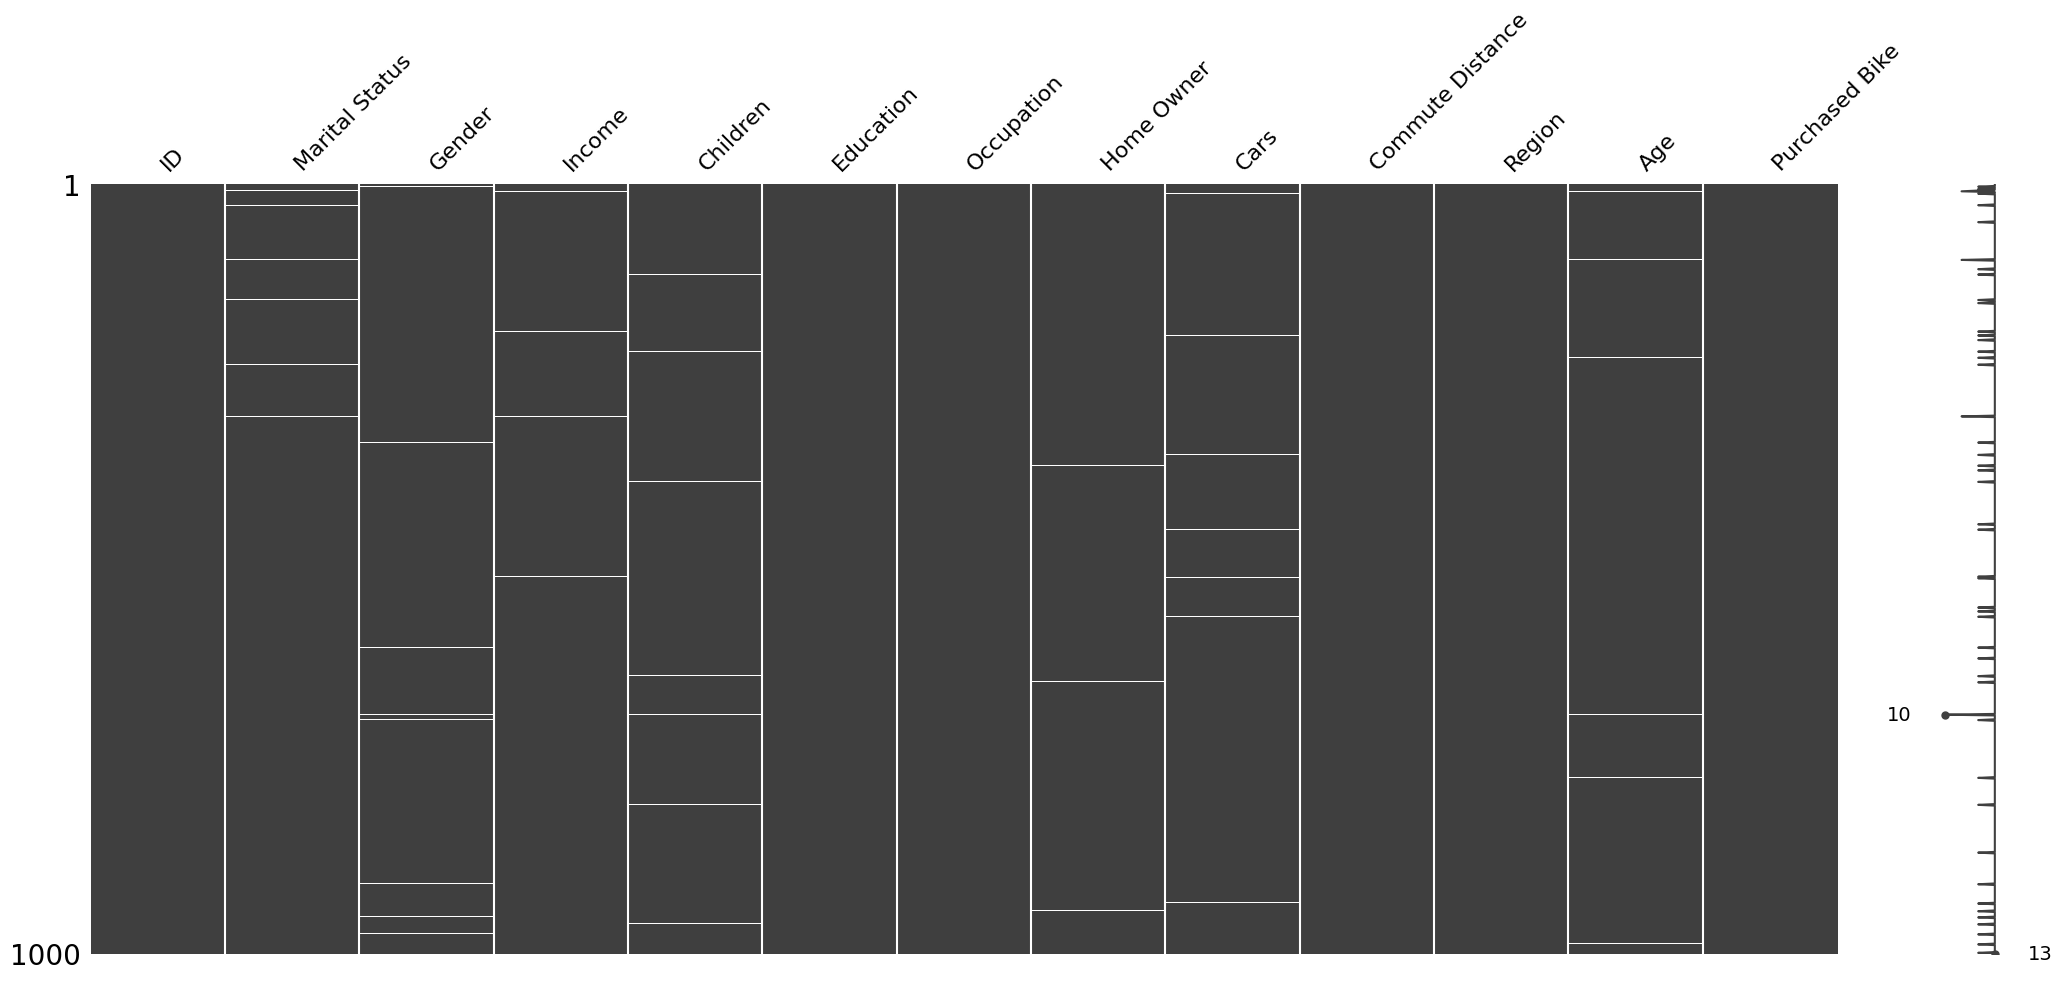

In [ ]:
msno.matrix(data_bike)

Teniendo conocimiento en que columna se encuentran los valores vacios o nulos procederemos a encontrar la cantidad mediante una grafica de barras .

In [ ]:
null_counts = data_bike.isnull().sum()
fig = ply.Figure(data= ply.Bar(x=null_counts.index, y=null_counts.values))
fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Valores nulos o vacios por coolumna</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    xaxis_title='Columna',
    yaxis_title='Cantidad de Valores Nulos'
)
fig.show()

Ahora procederomos a ubicar lso valores vacios de acuerdon con los ID de los usuarios y lo mostraremos en una tabla para su mejor vizualisacion.



In [ ]:
columnas_verificar = ['Marital Status', 'Gender', 'Income', 'Children', 'Home Owner', 'Cars', 'Age']
registros_vacios = data_bike[data_bike[columnas_verificar].isnull().any(axis=1)]

registros_vacios['User ID'] = registros_vacios.index
registros_vacios.rename(columns={'User ID': 'ID de Usuario'})

<ipython-input-219-337ddea59a4b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,ID de Usuario
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,3
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes,6
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No,8
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes,9
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No,12
27,18283,NaN,Female,100000.0,0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,40.0,No,27
49,14939,NaN,Male,40000.0,0.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,39.0,Yes,49
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes,98
110,21006,Single,Female,NaN,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes,110
117,24065,Single,Female,20000.0,NaN,High School,Manual,Yes,0.0,0-1 Miles,Europe,40.0,Yes,117


Ahora procederemos a encontrar los valores que pueden estar fuera de rango.Para eso usaremos dos tipos de grafica un histograma y y la otra una grafica de cajas

In [ ]:
# Histograma de Income
fig1 = px.histogram(data_bike, x='Income', nbins=20, title='Histograma de Income',width=600, height=400)
fig1.show()

En esta grafica podemos observar que hay un liguero salto en los ingresos desde 130k a 150k.

In [ ]:
fig = ply.Figure()

fig.add_trace(ply.Box(y=data_bike['Children'], name='Children'))
fig.add_trace(ply.Box(y=data_bike['Cars'], name='Cars'))
fig.add_trace(ply.Box(y=data_bike['Age'], name='Age'))

fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Datos fuera de rango</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    xaxis=dict(
        title={
            'text':'<b><span style="font-family:Calibri;>Variables</span></b>'
        }
    ),
    yaxis=dict(
         title={
            'text':'<b><span style="font-family:Calibri;>Valores</span></b>'
        }
    ),
    boxmode='group'
)
fig.show()


Para esta grafica usamos tres graficos de cajas tanto para las columnas children ,  cars , age que son valores numericos . Como podermos observar , solo la columna cars y age tienen bigotes es decir tienen posibles datos fuera de rango.


Ahora pasaremos a ubicar dichos valores fuera de rango . Para eso creamos una  función  llamado **Outliers(columna)** que calcula los valores atípicos (outliers) de una columna específica en el dataframe data_bike. Para este caso como observamos en la grafica solo evaluaremos para las columnas **Cars y Age**

In [ ]:
def Outliers(columna):
  Q1 = data_bike[columna].quantile(0.25)
  Q3 = data_bike[columna].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  outliers = data_bike[(data_bike[columna] < lower_limit) | (data_bike[columna] > upper_limit)]
  outliers_table = outliers[['ID', columna]]

  return outliers_table


esta funcion trabaja con los cuartiles , estos datos lo podemos  ubicar en la [Tablas de frecuencia](#criterio4)

In [ ]:
print("Valores atipicos Income(Ingresos) : " , len(Outliers('Income')) )
print("---------------------------------")
Outliers('Income')

Valores atipicos Income(Ingresos) :  10
---------------------------------


,ID,Income
6,27974,160000.0
12,11434,170000.0
43,17185,170000.0
121,15922,150000.0
178,14191,160000.0
259,12705,150000.0
321,16675,160000.0
356,23608,150000.0
829,16009,170000.0
993,11292,150000.0


In [ ]:
print("Valores atipicos Cars : ",len(Outliers('Cars')) )
print("---------------------------------")
Outliers('Cars')

Valores atipicos Cars :  59
---------------------------------


,ID,Cars
6,27974,4.0
11,12697,4.0
21,21564,4.0
51,20619,4.0
57,20567,4.0
70,14238,4.0
72,24857,4.0
75,12678,4.0
87,19608,4.0
121,15922,4.0


In [ ]:
print("Valores atipicos Age : ",len(Outliers('Age')) )
print("---------------------------------")
Outliers('Age')

Valores atipicos Age :  4
---------------------------------


,ID,Age
250,22931,78.0
375,15628,89.0
401,11555,80.0
595,18058,78.0


In [ ]:
print("Mid-range para Income:", ((data_bike['Income'].min() + data_bike['Income'].max()) / 2)) #Mid-range = (max+min)/2
print("Mid-range para Age:", ((data_bike['Age'].min() + data_bike['Age'].max()) / 2))
print("Mid-range para Children:", ((data_bike['Children'].min() + data_bike['Children'].max()) / 2))
print("Mid-range para Cars:", ((data_bike['Cars'].min() + data_bike['Cars'].max()) / 2))

Mid-range para Income: 90000.0
Mid-range para Age: 57.0
Mid-range para Children: 2.5
Mid-range para Cars: 2.0


In [ ]:
print("Max-Min para Age:", data_bike['Age'].max() - data_bike['Age'].min())
print("Max-Min para Income:", data_bike['Income'].max() - data_bike['Income'].min())
print("Max-Min para Children:", data_bike['Children'].max() - data_bike['Children'].min())
print("Max-Min para Cars:", data_bike['Cars'].max() - data_bike['Cars'].min())

Max-Min para Age: 64.0
Max-Min para Income: 160000.0
Max-Min para Children: 5.0
Max-Min para Cars: 4.0


La correlación más alta entre la edad y los niños.

In [ ]:
data_bike.corr()

<ipython-input-228-fecffa8fb0bd>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,ID,Income,Children,Cars,Age
ID,1.000000,-0.075081,-0.028747,0.022125,-0.054238
Income,-0.075081,1.000000,0.261053,0.439980,0.170845
Children,-0.028747,0.261053,1.000000,0.280243,0.531668
Cars,0.022125,0.439980,0.280243,1.000000,0.186398
Age,-0.054238,0.170845,0.531668,0.186398,1.000000


### 3.3 Preparacion de los datos <a name="data33"></a>

#### 3.3.1 Limpiar Datos <a name="data331"></a>

En esta primera parte del preprocesamiento, se identifican los valores NULL o "" y los combertimos a NA, Con el fin de sustituirlos por una tendencia central como la mediana o la moda.

In [ ]:
data_bike = data_bike.replace(['""', 'NULL'], 'NA')

Creaamos una funcion que nos dara la mediana o la moda, pasandole como parametro el tipo de tendencia central y la columna de la tabla

In [ ]:
def change(columna, tipo):
  if tipo =="mediana":
    valor = columna.median()
  elif tipo == "moda":
    valor1 = columna.mode()
    valor = valor1[0]
  columna.fillna(valor, inplace = True)

Tras la visuzalizacion anterior nos percatamos de ciertas columnas que tiene valores NA, por lo que aahora se tiene que cambiar por el de la mediana o la moda.

In [ ]:
from pandas.core.dtypes.astype import astype_nansafe
change(data_bike["Marital Status"], "moda")
change(data_bike["Gender"], "moda")
change(data_bike["Income"], "mediana")
change(data_bike["Children"], "mediana")
change(data_bike["Home Owner"], "moda")
change(data_bike["Cars"], "mediana")
change(data_bike["Age"], "mediana")

Visualizamos

<Axes: >

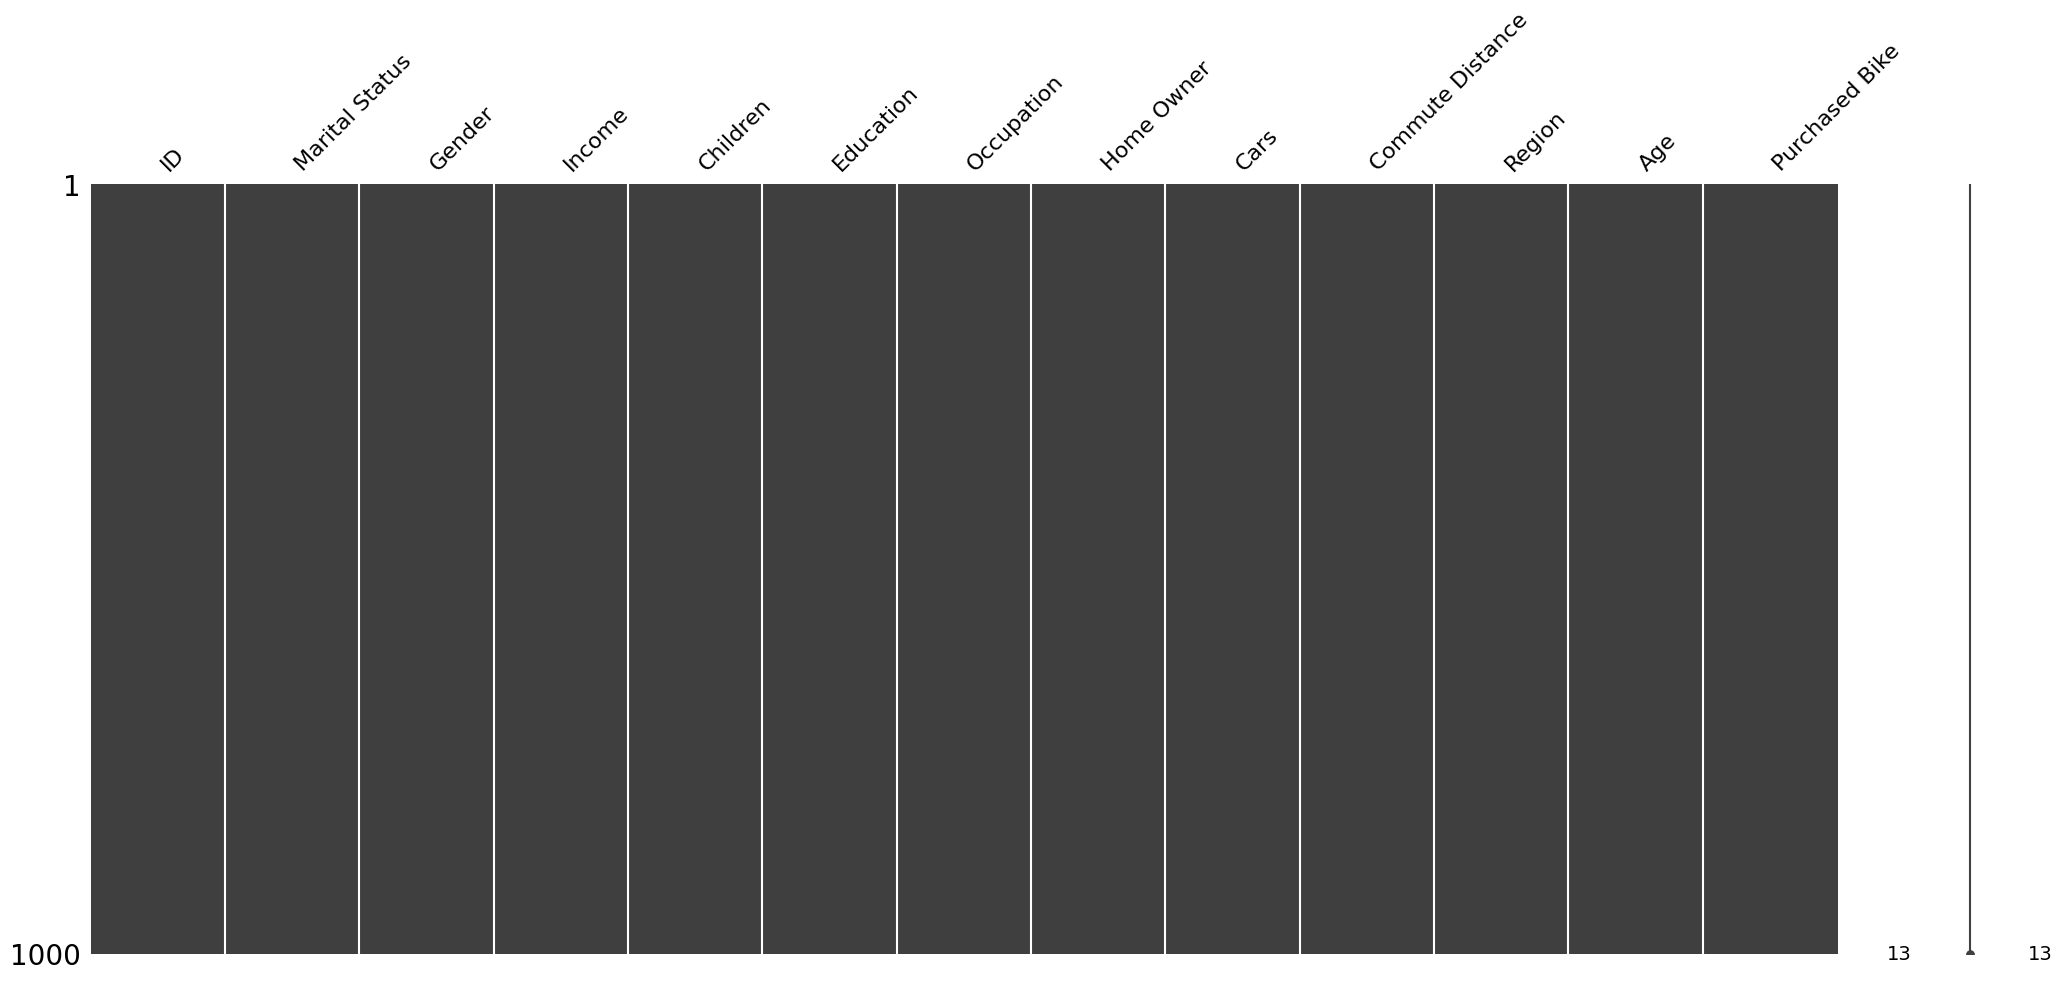

In [ ]:
msno.matrix(data_bike)

Ahora tenemos que pasar los datos objetos a datos categorico
Y para ver el tipo de dato, usamos info.

In [ ]:
print(data_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB
None


**outliers**

Para este caso, se obervo que los datos como cars, income  y age presentaban valore atipicos o outliers, donde la cantidad de valores en cars seria 59 valores, mientras que en income 10 y age son 4, dichos outliers no son una datos errados, si no que son casos contextuales atipicos.

Como se muetra en las tablas de arriba, para fines didacticos, se volveran a motrar

In [ ]:
print("Valores atipicos Income(Ingresos) : " , len(Outliers('Income')) )
print("---------------------------------")
Outliers('Income')

Valores atipicos Income(Ingresos) :  10
---------------------------------


,ID,Income
6,27974,160000.0
12,11434,170000.0
43,17185,170000.0
121,15922,150000.0
178,14191,160000.0
259,12705,150000.0
321,16675,160000.0
356,23608,150000.0
829,16009,170000.0
993,11292,150000.0


In [ ]:
print("Valores atipicos Income(Ingresos) : " , len(Outliers('Income')) )
print("---------------------------------")
Outliers('Cars')

Valores atipicos Income(Ingresos) :  10
---------------------------------


,ID,Cars
6,27974,4.0
11,12697,4.0
21,21564,4.0
51,20619,4.0
57,20567,4.0
70,14238,4.0
72,24857,4.0
75,12678,4.0
87,19608,4.0
121,15922,4.0


In [ ]:
print("Valores atipicos Income(Ingresos) : " , len(Outliers('Income')) )
print("---------------------------------")
Outliers('Age')

Valores atipicos Income(Ingresos) :  10
---------------------------------


,ID,Age
250,22931,78.0
375,15628,89.0
401,11555,80.0
595,18058,78.0


Para la exportacion a un archivo csv:

In [ ]:
def guardar_datos_en_csv(datos, nombre_archivo):
    try:
        datos.to_csv(nombre_archivo, index=False)
        print(f"Los datos se han guardado en el archivo {nombre_archivo}.")
    except IOError as e:
        print(f"Error al guardar los datos en el archivo CSV: {e}")

guardar_datos_en_csv(data_bike, "data_bike_clean.csv")

Los datos se han guardado en el archivo data_bike_clean.csv.


Para seguir trabajando con la data ya limpia guadaremos el bike_buyers_clean.csv en una variable.

In [ ]:
data_bike_clean = pd.read_csv('/content/data_bike_clean.csv')
data_bike_clean = pd.DataFrame(data_bike_clean)
data_bike_clean.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes



#### 3.3.2 Construir los datos <a name="data332"></a>

In [ ]:
categoric=[x for x in data_bike_clean.columns if data_bike_clean[x].dtypes=='object']
categoric

['Marital Status',
 'Gender',
 'Education',
 'Occupation',
 'Home Owner',
 'Commute Distance',
 'Region',
 'Purchased Bike']

In [ ]:
numeric=[y for y in data_bike_clean.columns if data_bike_clean[y].dtypes!='object']
numeric

['ID', 'Income', 'Children', 'Cars', 'Age']

trasformaremos a las variables que sean binarias en 1 y 0 para poder trabajar en el modelado

transformar género sí a 1 no a 0 es más útil para el modelado.

In [ ]:
data_bike.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
data_bike_clean['Gender'] = np.where(data_bike_clean['Gender'] == 'Female', 1, 0)
data_bike_clean.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,1,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,0,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,0,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,0,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,0,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
 #transformar Bicicleta_Comprada sí a 1 no a 0
data_bike_clean['Purchased Bike'] = np.where(data_bike_clean['Purchased Bike'] == 'Yes', 1, 0)

In [ ]:
#transformar Home Owner si es dueño de una propiedad sí a 1 no a 0
data_bike_clean['Home Owner'] = np.where(data_bike_clean['Home Owner'] == 'Yes', 1, 0)

In [ ]:
#no se puede trasformar a 1 y 0 porque no es binario
data_bike_clean.Occupation.unique

<bound method Series.unique of 0      Skilled Manual
1            Clerical
2        Professional
3        Professional
4            Clerical
            ...      
995      Professional
996      Professional
997    Skilled Manual
998        Management
999      Professional
Name: Occupation, Length: 1000, dtype: object>

In [ ]:
data_bike_clean.Region.unique

<bound method Series.unique of 0             Europe
1             Europe
2             Europe
3            Pacific
4             Europe
           ...      
995    North America
996    North America
997    North America
998    North America
999    North America
Name: Region, Length: 1000, dtype: object>

In [ ]:
display(data_bike_clean.dtypes)

ID                    int64
Marital Status       object
Gender                int64
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner            int64
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike        int64
dtype: object

In [ ]:
data_bike_clean['Cars'] = data_bike_clean['Cars'].astype(int)
data_bike_clean['Age'] = data_bike_clean['Age'].astype(int)
data_bike_clean['Children'] = data_bike_clean['Children'].astype(int)

display(data_bike_clean.dtypes)

ID                    int64
Marital Status       object
Gender                int64
Income              float64
Children              int64
Education            object
Occupation           object
Home Owner            int64
Cars                  int64
Commute Distance     object
Region               object
Age                   int64
Purchased Bike        int64
dtype: object

#### 3.3.3 Requerimientos <a name="data333"></a>

##### 1. ¿Cuánto es el promedio de ingresos de los clientes?

In [ ]:
promedio_income = data_bike_clean['Income'].mean()

fig = ply.Figure()

fig.add_trace(ply.Scatter(x=data_bike_clean.index, y=data_bike_clean['Income'], mode='lines', name='Income(Ingreso)'))
fig.add_trace(ply.Scatter(x=[data_bike_clean.index[0], data_bike_clean.index[-1]], y=[promedio_income, promedio_income],
                         mode='lines', name='Promedio Income'))

fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Promedio de Income (Ingreso)</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    xaxis_title='ID',
    yaxis_title='Income')
fig.show()

Como podemos observar en la grafica lineal , el promedio de los ingresos de los clientes es de 56267.605634 dolares y esta representada en la grafica con una linea horizontal de color rojo.

 ##### 2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

In [ ]:
promedio_ingresos = data_bike_clean.groupby('Marital Status')['Income'].mean().reset_index()

fig = ply.Figure(data=[
    ply.Bar(x=promedio_ingresos[promedio_ingresos['Marital Status'] == 'Married']['Marital Status'],
           y=promedio_ingresos[promedio_ingresos['Marital Status'] == 'Married']['Income'],
           name='Casado',
           marker=dict(color='blue')),
    ply.Bar(x=promedio_ingresos[promedio_ingresos['Marital Status'] == 'Single']['Marital Status'],
           y=promedio_ingresos[promedio_ingresos['Marital Status'] == 'Single']['Income'],
           name='Soltero',
           marker=dict(color='green'))
])

fig.update_layout(title='Promedio de Ingresos según Estado Civil',
                  xaxis_title='Estado Civil',
                  yaxis_title='Promedio de Ingresos',
                  barmode='group',
                  showlegend=True)

fig.show()

##### 3. Crear una nueva variable llamado Con_hijos
Dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [ ]:
data_bike_clean["Con_hijos"] = data_bike_clean["Children"].apply(lambda x: True if x > 0 else False)
data_bike_clean['Con_hijos'] = data_bike_clean['Con_hijos'].astype(str)
promedio_hijos = data_bike_clean.groupby('Education')['Con_hijos'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
colors = ['#FF8C00', '#008000']
fig = ply.Figure()
fig.add_trace(ply.Bar(x=promedio_hijos[promedio_hijos['Con_hijos'] == 'True']['Education'],
                     y=promedio_hijos[promedio_hijos['Con_hijos'] == 'True']['Percentage'],
                     name='Con hijos',
                     marker=dict(color=colors[0])))
fig.add_trace(ply.Bar(x=promedio_hijos[promedio_hijos['Con_hijos'] == 'False']['Education'],
                     y=promedio_hijos[promedio_hijos['Con_hijos'] == 'False']['Percentage'],
                     name='Sin hijos',
                     marker=dict(color=colors[1])))
fig.update_layout(title='Promedio de Hijos según Nivel Educativo',
                  xaxis_title='Nivel Educativo',
                  yaxis_title='Porcentaje de Clientes',
                  legend_title='Estado de hijos')
fig.show()

##### 4. Crear una nueva variable llamado Con_vehiculo
Dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

Primero creamos una nueva columna  llamada "Con_vehiculo" y la condicional

In [ ]:
data_bike_clean['Con_vehiculo'] = data_bike_clean['Cars'].apply(lambda x: 'Si' if x > 0 else 'No')

Luego mostramos los clientes que tienen vehiculos de acuerdo con su ocupacion

In [ ]:
fig1 = ply.Figure(data=[
    ply.Bar(
        name='Con vehículo',
        x=data_bike_clean[data_bike_clean['Con_vehiculo'] == 'Si']['Occupation'].value_counts().index,
        y=data_bike_clean[data_bike_clean['Con_vehiculo'] == 'Si']['Occupation'].value_counts().values
    ),
    ply.Bar(
        name='Sin vehículo',
        x=data_bike_clean[data_bike_clean['Con_vehiculo'] == 'No']['Occupation'].value_counts().index,
        y=data_bike_clean[data_bike_clean['Con_vehiculo'] == 'No']['Occupation'].value_counts().values
    )
])

In [ ]:
fig1.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Cantidad de Clientes con y sin Vehículo por Ocupación</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    xaxis=dict(title='Ocupación'),
    yaxis=dict(title='Cantidad de Clientes'),
    barmode='stack'
)
fig1.show()

Luego procedemos a sacar el promedio de vehiculos a las personas que si tienen vehiculos de acuerdo a su tipo de ocupacion.

In [ ]:
promedio_vehiculos = data_bike_clean[data_bike_clean['Con_vehiculo'] == 'Si'].groupby('Occupation')['Cars'].mean().reset_index(name='Prom Cars')

datos_clientes_vehiculo = data_bike_clean[data_bike_clean['Con_vehiculo'] == 'Si'].groupby('Occupation').size().reset_index(name='Cantidad')
# Unir los datos de promedio de vehículos y cantidad de clientes con vehículo por ocupación
tabla_final = promedio_vehiculos.merge(datos_clientes_vehiculo, on='Occupation')
pd.DataFrame(tabla_final)

,Occupation,Prom Cars,Cantidad
0,Clerical,1.480000,100
1,Management,2.345912,159
2,Manual,1.441860,86
3,Professional,2.126126,222
4,Skilled Manual,1.712821,195


Para visualizar mejor los datos mostrados en la tabla mostraremos en una grafica de burbujas

In [ ]:
import plotly.graph_objects as ply

# Crear el gráfico de burbujas
fig = ply.Figure(data=ply.Scatter(
    x=tabla_final['Occupation'],
    y=tabla_final['Cantidad'],
    mode='markers',
    marker=dict(
        size=tabla_final['Cantidad'],
        sizemode='diameter',
        sizeref=2,  # Ajustar este valor para reducir el tamaño de las burbujas
        sizemin=1,
        color=tabla_final['Cantidad'],
        colorscale='Viridis',
        showscale=True
    ),
    text=["Promedio de Vehículos: {:.2f}<br>Cantidad de Clientes: {}".format(promedio, cantidad) for promedio, cantidad in zip(tabla_final['Prom Cars'], tabla_final['Cantidad'])],
    hoverinfo='text'
))

fig.update_layout(
     title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Promedio de Vehículos por Tipo de Ocupación</span></b>',
        'x': 0.5,
        'y': 0.95,
    },

    xaxis=dict(title='Tipo de Ocupación'),
    yaxis=dict(title='Cantidad de Clientes con Vehículo')
)

# Mostrar el gráfico
fig.show()


##### 5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

In [ ]:
promedio_edad_propietarios = data_bike_clean[data_bike_clean['Home Owner'] == 1]['Age'].mean()
promedio_edad_no_propietarios = data_bike_clean[data_bike_clean['Home Owner'] == 0]['Age'].mean()

print("Promedio de Edad para Propietarios de Vivienda:", promedio_edad_propietarios)
print("Promedio de Edad para No Propietarios de Vivienda:", promedio_edad_no_propietarios)


Promedio de Edad para Propietarios de Vivienda: 45.024781341107875
Promedio de Edad para No Propietarios de Vivienda: 42.30891719745223


Para poder entender mas estos datos , pasaremos a mostrarlos en graficos donde primero veremos un grafico de Pie Charts donde veremos la cantidad de clientes si/no tienen vivienda

In [ ]:
# Obtener la cantidad de clientes propietarios y no propietarios de vivienda
propietarios = data_bike_clean[data_bike_clean['Home Owner'] == 1].shape[0]
no_propietarios = data_bike_clean[data_bike_clean['Home Owner'] == 0].shape[0]

# Crear el gráfico de pastel
labels = ['Propietarios', 'No Propietarios']
sizes = [propietarios, no_propietarios]
colors = ['lightblue', 'lightgreen']

fig = ply.Figure(data=[ply.Pie(labels=labels, values=sizes, textinfo='value', marker=dict(colors=colors))])
fig.update_layout(
      title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Distribución de Clientes Propietarios y <br> No Propietarios de Vivienda</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    width=600,
    height=400
    )

# Mostrar los valores numéricos en el gráfico
fig.update_traces(textposition='inside', textfont=dict(color='white'))

fig.show()


Luego otra grafica de Box Plots donde observaremos el promedio de edades de las personas que si/no tienen viviendas

In [ ]:

promedio_edad = data_bike_clean.groupby('Home Owner')['Age'].mean()

fig = ply.Figure()

for propiedad, edad in promedio_edad.items():
    fig.add_trace(ply.Box(y=data_bike_clean[data_bike_clean['Home Owner'] == propiedad]['Age'],
                         name=f'{propiedad} (Promedio de Edad: {edad:.2f})')) # 0: Sin propiedad 1: Con propiedad


# Configurar el diseño del boxplot
fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Promedio de Edad según Propiedad de la Vivienda</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    yaxis=dict(title='Edad'),
    showlegend=False
)

# Mostrar el boxplot
fig.show()


##### ¿Que variable se correlaciona con otra?

In [ ]:
import math
import seaborn as sns

In [ ]:
corelation = data_bike_clean.corr()
corelation

<ipython-input-262-006389c694f4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike
Gender,1.000000,-0.050775,0.009290,-0.001957,-0.063651,-0.001611,0.015179
Income,-0.050775,1.000000,0.258856,0.014271,0.433564,0.170326,0.047483
Children,0.009290,0.258856,1.000000,0.158384,0.275364,0.525683,-0.121342
Home Owner,-0.001957,0.014271,0.158384,1.000000,-0.075976,0.111436,-0.017103
Cars,-0.063651,0.433564,0.275364,-0.075976,1.000000,0.184295,-0.198774
Age,-0.001611,0.170326,0.525683,0.111436,0.184295,1.000000,-0.106472
Purchased Bike,0.015179,0.047483,-0.121342,-0.017103,-0.198774,-0.106472,1.000000


In [ ]:
covariance=data_bike_clean.cov()
covariance

<ipython-input-263-2f3b26b46af5>:1: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike
Gender,0.250129,-7.865966e+02,0.007529,-0.000454,-0.035575,-0.009117,0.003795
Income,-786.596597,9.594954e+08,12992.802803,205.265265,15008.218218,59707.827828,735.245245
Children,0.007529,1.299280e+04,2.625705,0.119173,0.498638,9.639948,-0.098289
Home Owner,-0.000454,2.052653e+02,0.119173,0.215620,-0.039425,0.585594,-0.003970
Cars,-0.035575,1.500822e+04,0.498638,-0.039425,1.248848,2.330759,-0.111042
Age,-0.009117,5.970783e+04,9.639948,0.585594,2.330759,128.072488,-0.602334
Purchased Bike,0.003795,7.352452e+02,-0.098289,-0.003970,-0.111042,-0.602334,0.249889


<Axes: >

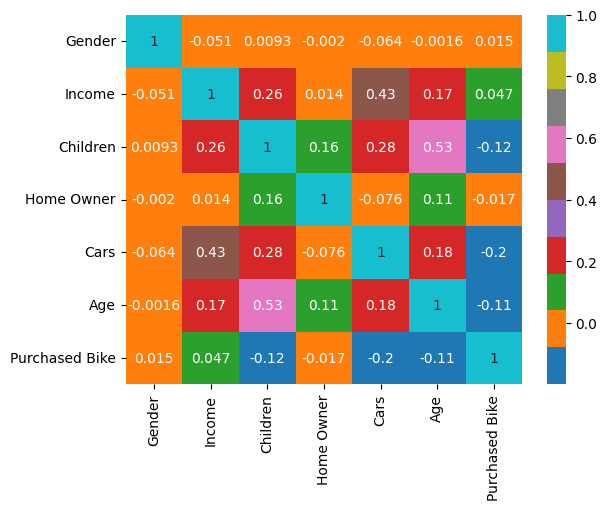

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns,
            yticklabels=corelation.columns, annot=True,
            cmap=sns.color_palette( as_cmap=True))

observando la grafica podemos decir que la correlación entre hijos y edad es máxima. En segundo lugar coche e ingresos.





##### ¿Existe alguna relación entre el género y la bicicleta comprada?

In [ ]:
correlacion = pd.crosstab(data_bike_clean['Purchased Bike'], data_bike_clean['Gender'], margins=True)
correlacion

Gender,0,1,All
Purchased Bike,,,
0,269,250,519
1,242,239,481
All,511,489,1000


### 3.4 Modelado <a name="data34"></a>

### Escoger la técnica de modelado
Para este trabajo escojeremos el entrenamiento  de un modelo de regresión lineal
Primero necesitaremos dividir nuestros datos en una matriz X que contenga las características para entrenar, y una matriz y con la variable de destino, en este caso la columna Precio. No consideramos la columna Dirección porque solo tiene información de texto que el modelo de regresión lineal no puede usar.

Con este modelo comprobaremos si existe una relación entre las variables de entradas y la de salida, luego, intentaremos predecir el valor de la variable de salida en función de nuestra variable de entrada.

Matrices X e y
Intentaremos explicar el comportamiento de una variable a partir de los datos de otras variables.



Para este modelado consideramo que la variable ID es irrelevante ya que podemos encontrar los datos segun el numero de fila

In [ ]:
data_bike_clean.drop('ID', inplace=True, axis=1)

In [ ]:
o=[]
for i in data_bike_clean.columns:
    if data_bike_clean[i].dtype=='object':
        o.append(i)

Xenc=pd.get_dummies(data_bike_clean,columns=o)

In [ ]:
Xenc.head()

,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike,Marital Status_Married,Marital Status_Single,Education_Bachelors,...,Occupation_Professional,Occupation_Skilled Manual,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,1,40000.0,1,1,0,42,0,1,0,1,...,0,1,1,0,0,0,0,1,0,0
1,0,30000.0,3,1,1,43,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,80000.0,5,0,2,60,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
3,0,70000.0,0,1,1,41,1,0,1,1,...,1,0,0,0,0,0,1,0,0,1
4,0,30000.0,0,0,0,36,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0


A la variable objeto de estudio se la denomina variable de salida o de respuesta: y Purchased Bike

A las variables que nos ayudarán en el estudio se las llama variables de entrada, explicativas o predictoras: X

In [ ]:
X = Xenc.drop("Purchased Bike", axis=1)
y = Xenc[["Purchased Bike"]]

###### Obtener conjunto de datos de Entrenamiento (Train) y de Prueba (Test)
Ahora dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba. Entrenaremos el modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

### Generar el plan de prueba

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       106
           1       0.53      0.49      0.51        94

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.56      0.55       200



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Construir el modelo

In [ ]:
# Generación del scoring de venta para nuevos clientes
new_data = pd.DataFrame({
    'ID': [11147, 54321],
    'Marital Status': ['Married', 'Single'],
    'Gender': ['Female', 'Male'],
    'Income': [50000, 20000],
    'Children': [2, 0],
    'Education': ['Partial College', 'High School'],
    'Occupation': ['Skilled Manual', 'Unemployed'],
    'Home Owner': ['No', 'Yes'],
    'Cars': [1, 0],
    'Commute Distance': ['0-1 Miles', '1-2 Miles'],
    'Region': ['Europe', 'Pacific'],
    'Age': [35, 28]
})

new_data_encoded = pd.get_dummies(new_data, columns=['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region'])
new_X = new_data_encoded.reindex(columns=X.columns, fill_value=0)
scores = model.predict_proba(new_X)[:, 1]

print("Scoring de venta:")
for i in range(len(new_data)):
    print(f"ID: {new_data['ID'].iloc[i]}, Scoring: {scores[i]}")


Scoring de venta:
ID: 11147, Scoring: 0.4938523721733299
ID: 54321, Scoring: 0.631335082782635


## 4. Conclusion  <a name="data4"></a>
Con lo que hemos visto de las gráficas tenemos estás conclusiones:
1. El pormedio de ingresos en general rondan cerca de los 60 000 $. Siendo los casados, los que tienen mayor ingresos
2. Casi todos los clientes sin importar su nivel educativo, tienen hijos
3. La mayoría de los clientes que poseen vehículo son profesionales
4. El 100% de los clientes son propietarios de una vivienda
5. El promedio de edad de las personas sin vivienda es de 42 años, mientras que las que si tienen son de 45
6. La correlación entre hijos y edad es máxima. En segundo lugar coche e ingresos.

Enlace al git :https://github.com/AbigailBG153/FDS-2023-1-CC52.git
